## Su Kalitesi Keşifsel Veri Analizi Ve Modelleme

## Content
1. [Python Libraries](#1)
1. [Read And Analysis Data](#2)
1. [Dependent Variable Analysis](#3)
1. [Correlation Between Features](#4)
1. [Distrubutions Of Features](#5)
1. [Preprocessing:Missing Value Problem](#6)
1. [Preprocessing:Train Test Split and Normalization](#7)
1. [Modelling with Decision Tree and Random Forest Classifier](#8)
1. [Visualize Decision Tree](#9)
1. [Random Forests Hyperparameter Tuning](#10 )

<a id="1"></a>
## Python Libraries

In [18]:
import pandas  as pd
import numpy as np

#Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import precision_score,confusion_matrix

from sklearn import tree

<a id="2"></a>
## Read And Analysis Data

In [8]:
df=pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<a id="3"></a>
## Dependent Variable Analysis

In [23]:
d=pd.DataFrame(df["Potability"].value_counts())
fig=px.pie(d, values="Potability",names=["Not Potable","Potable"],hole=0.3,opacity=0.8,
          labels={"label":"Potability","Potability":"Number Of Samples"})
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

<a id="4"></a>
## Correlation Between Features

In [24]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


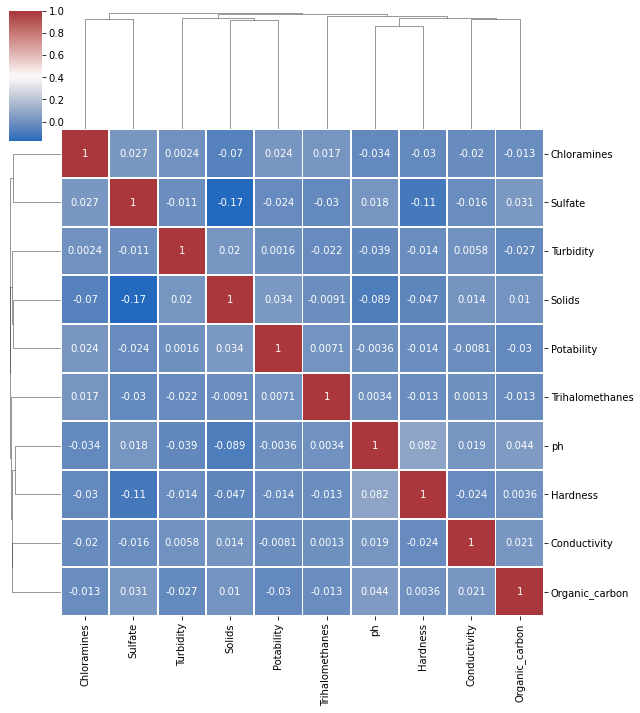

In [25]:
sns.clustermap(df.corr(),cmap="vlag",dendrogram_ratio=(0.1,0.2),annot=True,linewidths=.8,figsize=(9,10))
plt.show()

<a id="5"></a>
## Distrubutions Of Features

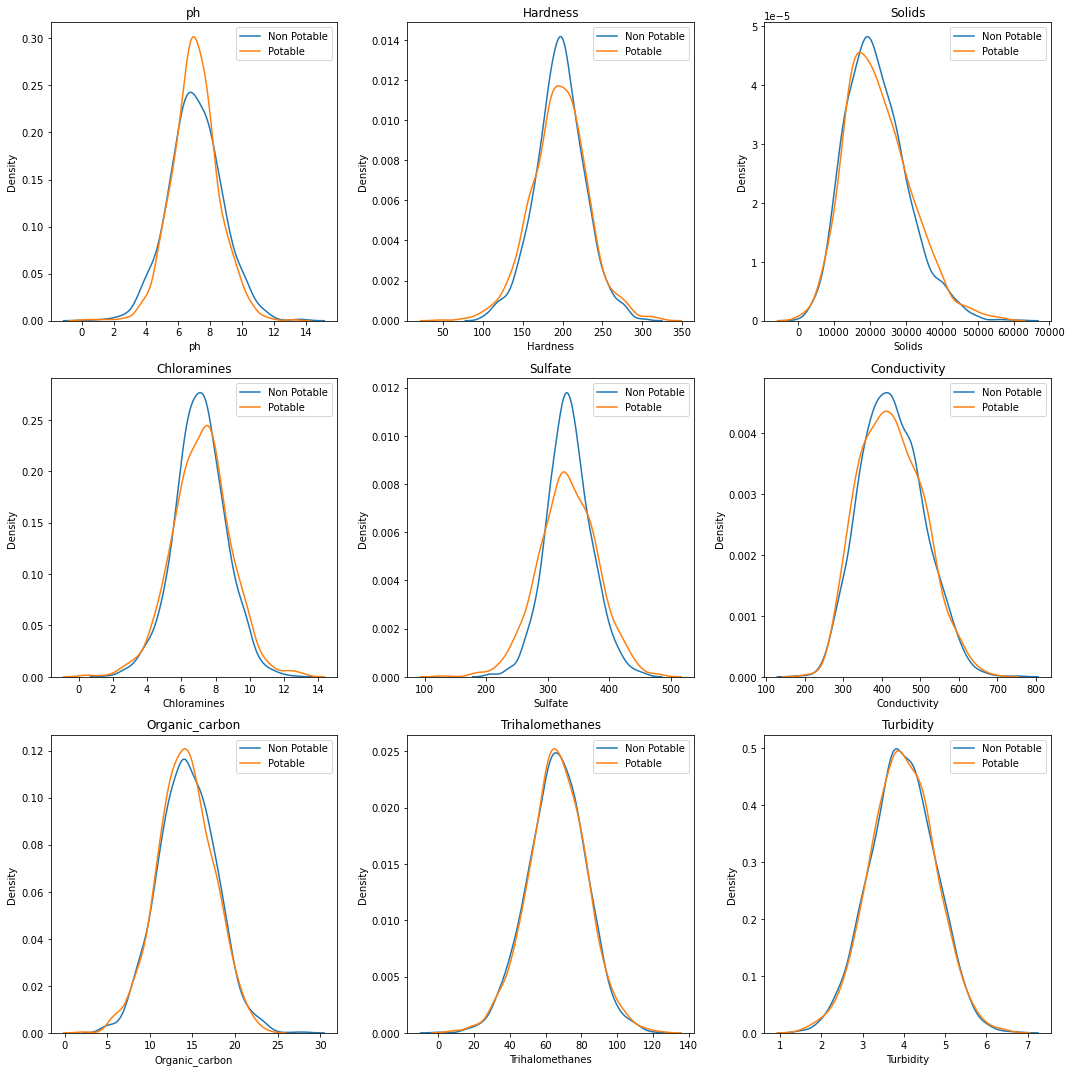

In [27]:
non_pot=df.query("Potability==0")
pot=df.query("Potability==1")
plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_pot[col],label="Non Potable")
    sns.kdeplot(x=pot[col],label="Potable")
    plt.legend()
plt.tight_layout() 

<a id="6"></a>
## Preprocessing:Missing Value Problem

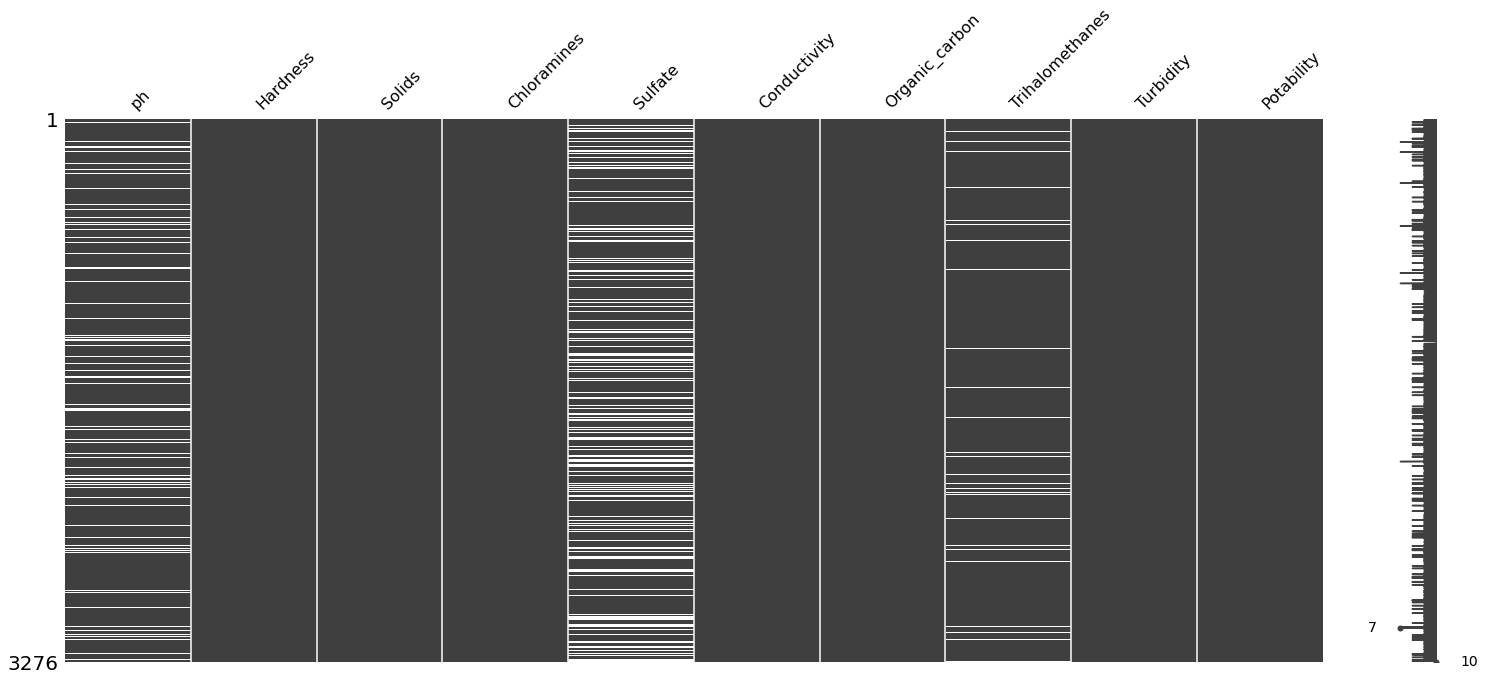

In [33]:
msno.matrix(df)
plt.show()

In [34]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [36]:
## Handle missing value with average of features
df["ph"].fillna(value=df["ph"].mean(),inplace=True)
df["Sulfate"].fillna(value=df["Sulfate"].mean(),inplace=True)
df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean(),inplace=True)

In [37]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<a id="7"></a>
## Preprocessing:Train Test Split and Normalization

In [39]:
X=df.drop("Potability",axis=1).values
y=df["Potability"].values

In [40]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=3)

In [41]:
X_train.shape

(2293, 9)

In [42]:
## Min-Max Normalization
x_train_max=np.max(X_train)
x_train_min=np.min(X_train)
X_train=(X_train-x_train_min)/(x_train_max-x_train_min)
X_test=(X_test-x_train_min)/(x_train_max-x_train_min)

In [43]:
x_train_max

61227.196007712126

In [44]:
x_train_min

0.0

In [45]:
X_train

array([[1.33635114e-04, 3.04881667e-03, 3.20811595e-01, ...,
        1.88177761e-04, 9.06360004e-04, 7.52155588e-05],
       [1.12231291e-04, 3.22596993e-03, 3.19433111e-01, ...,
        2.97918455e-04, 1.07295834e-03, 6.82766742e-05],
       [1.26208967e-04, 3.72126660e-03, 3.06529498e-01, ...,
        1.34472997e-04, 1.08902935e-03, 7.51594453e-05],
       ...,
       [1.20536384e-04, 3.88589798e-03, 2.75409370e-01, ...,
        2.16480196e-04, 1.51672073e-03, 8.21604210e-05],
       [1.31168104e-04, 3.63610355e-03, 2.96189213e-01, ...,
        1.97068682e-04, 1.28292193e-03, 5.45326316e-05],
       [1.01320545e-04, 2.27234125e-03, 1.09399736e-01, ...,
        2.18337037e-04, 1.11549595e-03, 7.03208646e-05]])

In [46]:
X_test

array([[1.04239864e-04, 3.47620875e-03, 3.96225097e-01, ...,
        2.01429756e-04, 1.10651795e-03, 4.70602974e-05],
       [1.15647865e-04, 3.35028087e-03, 2.86441169e-01, ...,
        2.26377399e-04, 1.53060866e-03, 4.89929723e-05],
       [1.35952366e-04, 4.28271426e-03, 3.47767498e-01, ...,
        2.88836592e-04, 1.18156337e-03, 6.78421180e-05],
       ...,
       [1.00454592e-04, 3.47589619e-03, 2.45279031e-01, ...,
        2.09882315e-04, 1.22541612e-03, 7.85686344e-05],
       [1.03965193e-04, 3.34910872e-03, 1.14993632e-01, ...,
        2.67084875e-04, 1.21371869e-03, 8.37114372e-05],
       [1.15647865e-04, 3.23768556e-03, 4.32588509e-01, ...,
        1.80185289e-04, 1.04087398e-03, 6.77576565e-05]])

<a id="8"></a>
## Modelling with Decision Tree and Random Forest Classifiers

In [53]:
models=[("DTC",DecisionTreeClassifier(max_depth=3)),
       ("RF",RandomForestClassifier())]

In [54]:
finalresults=[]
cmlist=[]
for name, model in models:
    model.fit(X_train,y_train)
    model_result=model.predict(X_test)
    score=precision_score(y_test,model_result)
    cm=confusion_matrix(y_test,model_result)
    
    finalresults.append((name,score))
    cmlist.append((name,cm))
finalresults

[('DTC', 0.5652173913043478), ('RF', 0.6135265700483091)]

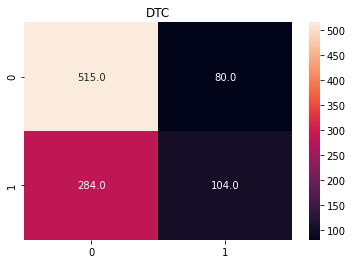

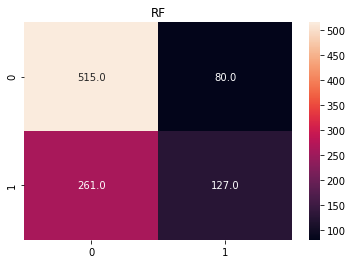

In [56]:
for name , i in cmlist:
    plt.figure()
    sns.heatmap(i,annot=True,linewidths=0.0,fmt=".1f")
    plt.title(name)
    plt.show()

<a id="9"></a>
## Visualize Decision Tree

In [59]:
dt_clf=models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

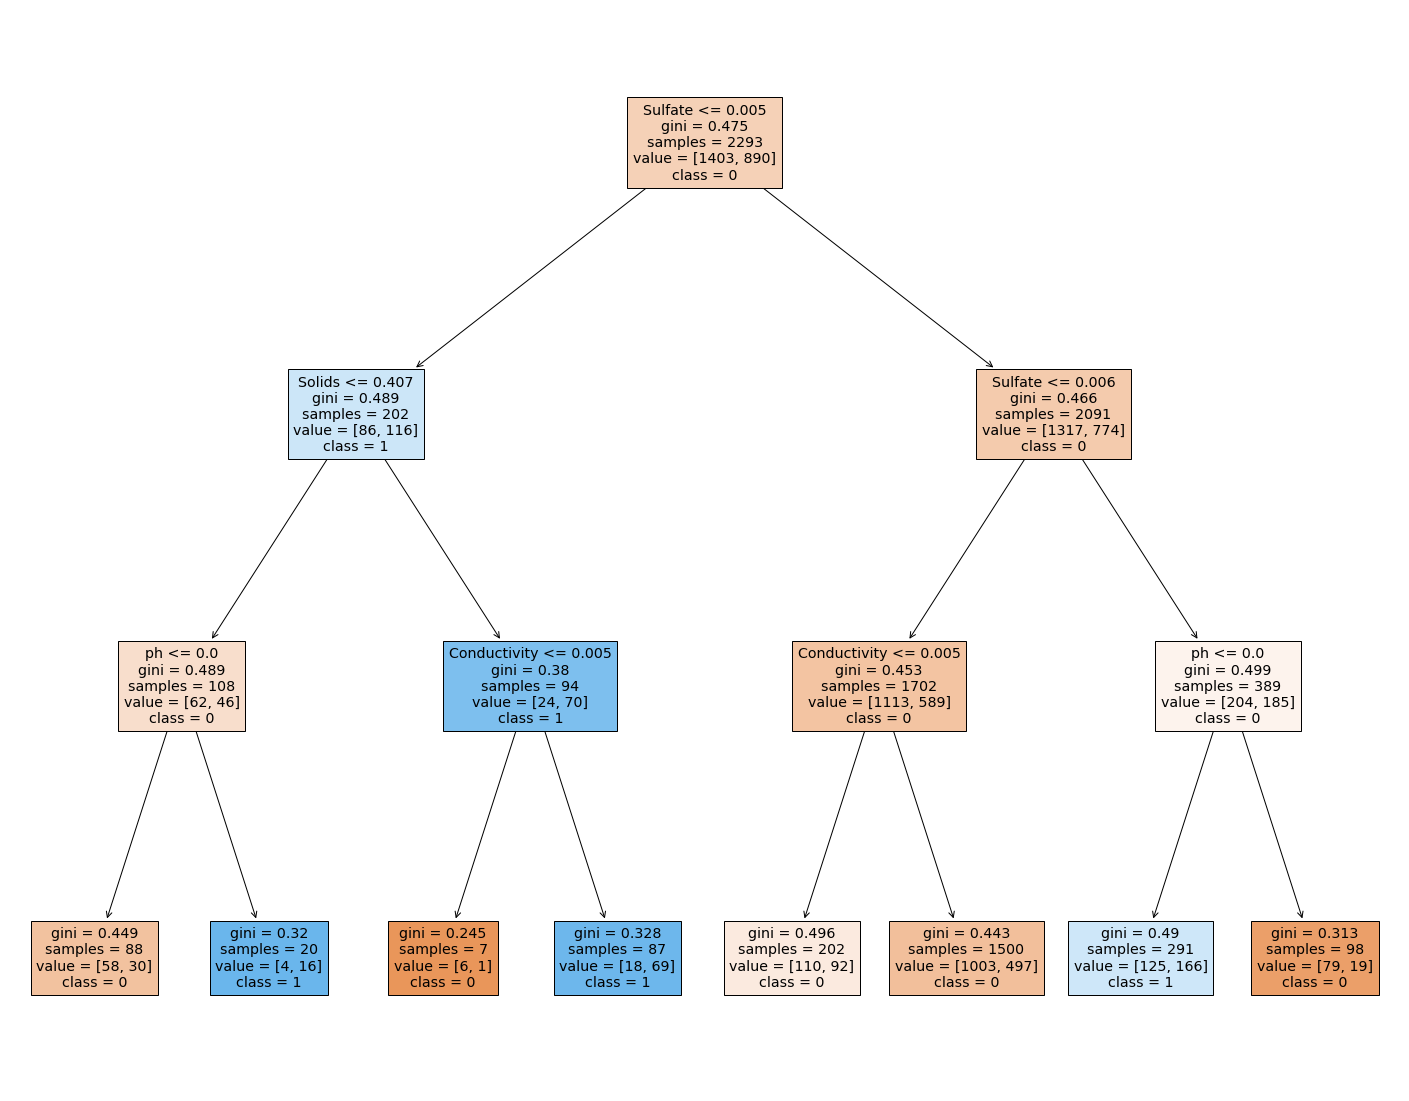

In [61]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf,
              feature_names=df.columns.tolist()[:-1],
              class_names=["0","1"],
              filled=True)
plt.show()

In [62]:
# En önemli feature sülfat çünkü ilk olarak onu ayırmış


<a id="10"></a>
## Random Forests Hyperparameter Tuning

In [70]:
model_params={
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10,50,100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [71]:
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
score=[]
for model_name,params in model_params.items():
    rs=RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10)
    rs.fit(X,y)
    score.append([model_name,dict(rs.best_params_),rs.best_score_])

In [72]:
score

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 13},
  0.668346909327872]]